In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/My Drive/Python/PycharmProjects/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df = df.drop(['id', 'date'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df['price'].corr(df['sqft_living'])

0.7020350546117996

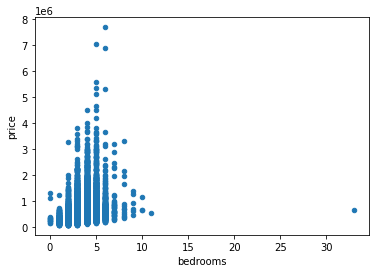

In [9]:
df.plot.scatter(x='bedrooms', y='price')

In [10]:
#x is the explanatory variables
#variables used to predict

X = df.iloc[:,1:].values
X[0]

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  9.81780e+04,  4.75112e+01, -1.22257e+02,
        1.34000e+03,  5.65000e+03])

In [11]:
#y is the explained variable (price in this case)
#variable tryong to predict
y = df.iloc[:,0].values
y[0]

221900.0

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 1/3, shuffle = False)

In [17]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
model = sm.OLS(y_train, x_train).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              7821.
Date:                Tue, 15 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:24:14   Log-Likelihood:                     -1.9647e+05
No. Observations:               14408   AIC:                                  3.930e+05
Df Residuals:                   14391   BIC:                                  3.931e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -3.79e+04   2387.699    -15.872      0.000   -4.26e+04   -3.32e+04
x2            3.8e+04   4042.265      9.401      0.000    3.01e+04    4.59e+04
x3           114.9542      2.776     41.415      0.000     109.514     120.395
x4             0.1601      0.057      2.832      0.005       0.049       0.271
x5         -4683.5929   4593.383     -1.020      0.308   -1.37e+04    4320.029
x6          6.516e+05   2.16e+04     30.148      0.000    6.09e+05    6.94e+05
x7           4.89e+04   2583.740     18.924      0.000    4.38e+04     5.4e+04
x8           2.66e+04   2745.510      9.688      0.000    2.12e+04     3.2e+04
x9          8.927e+04   2677.948     33.336      0.000     8.4e+04    9.45e+04
x10           78.7031      2.863     27.492      0.000      73.092      84.315
x11           36.2511      3.227     11.232      0.000      29.925      42.577
x12        -2806.2296     84.558    -33.187      0.000   -2971.974   -2640.485
x13           23.9591      4.367      5.487      0.000      15.400      32.518
x14         -476.2924     22.225    -21.430      0.000    -519.856    -432.728
x15         5.798e+05   1.31e+04     44.235      0.000    5.54e+05    6.05e+05
x16        -1.965e+05   1.63e+04    -12.087      0.000   -2.28e+05   -1.65e+05
x17           32.9731      4.297      7.674      0.000      24.551      41.395
x18           -0.4450      0.089     -5.026      0.000      -0.619      -0.271
==============================================================================
Omnibus:                    13429.888   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1927343.724
Skew:                           4.038   Prob(JB):                         0.00
Kurtosis:                      59.082   Cond. No.                     3.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[10]

503304.5841955022

In [24]:
y_test[10]

606500.0

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(predictions, y_test)

40275521020.8236